In [73]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [74]:
# Load the Diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [75]:
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [76]:
y[:5]

array([151.,  75., 141., 206., 135.])

In [77]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [78]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [79]:
predictions[0:5]

array([256.85155936, 123.40748364, 181.32527644, 193.1395319 ,
       129.26478696])

Text(0, 0.5, 'Predictions')

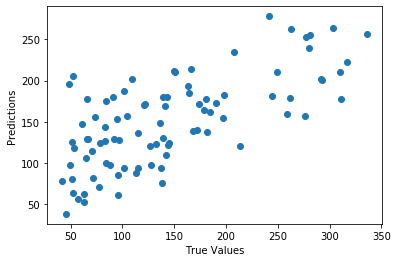

In [80]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [81]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 57.751455626712946
Train RMSE: 52.46784964662741


# Cross Validation

In [82]:
from sklearn.model_selection import KFold # import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

2

In [83]:
print(kf) 

KFold(n_splits=2, random_state=None, shuffle=False)


In [84]:
for train_index, test_index in kf.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


### LOOCV

In [85]:
from sklearn.model_selection import LeaveOneOut 
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
loo = LeaveOneOut()
loo.get_n_splits(X)

LeaveOneOut()
for train_index, test_index in loo.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [1 2 3] TEST: [0]
TRAIN: [0 2 3] TEST: [1]
TRAIN: [0 1 3] TEST: [2]
TRAIN: [0 1 2] TEST: [3]


In [86]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [34]:
# Perform 6-fold cross validation
scores = cross_val_score(model, df, y, cv=6)
print ('Cross-validated scores:', scores)

ValueError: Found input variables with inconsistent numbers of samples: [442, 4]

In [ ]:
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

In [ ]:
np.sqrt(mean_squared_error(y,predictions))

# tasks 

##### Find out cross validation results without using cross_val_predict

In [72]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
cv = KFold(n_splits=4)
ypred_all = np.chararray((y.shape))
i = 1
for train_index, test_index in cv.split(X):
    print("iteration", i, ":")
    print("train indices:", train_index)
    print("train data:", X[train_index])
    print("test indices:", test_index)
    print("test data:", X[test_index])
    model.fit(X[train_index], y[train_index])
    ypred = model.predict(X[test_index])
    print("predicted labels for data of indices", test_index, "are:", ypred)
    ypred_all[test_index] = ypred
    print("merged predicted labels:", ypred_all)
    i = i+1
    print("\n")
    
y_cross_val_predict = cross_val_predict(model, X, y, cv=cv)
print("predicted labels by cross_val_predict:", y_cross_val_predict)

iteration 1 :
train indices: [1 2 3]
train data: [[3 4]
 [1 2]
 [3 4]]
test indices: [0]
test data: [[1 2]]
predicted labels for data of indices [0] are: [3.]
merged predicted labels: [b'3' '' '' b'\x01']


iteration 2 :
train indices: [0 2 3]
train data: [[1 2]
 [1 2]
 [3 4]]
test indices: [1]
test data: [[3 4]]
predicted labels for data of indices [1] are: [4.]
merged predicted labels: [b'3' b'4' '' b'\x01']


iteration 3 :
train indices: [0 1 3]
train data: [[1 2]
 [3 4]
 [3 4]]
test indices: [2]
test data: [[1 2]]
predicted labels for data of indices [2] are: [1.]
merged predicted labels: [b'3' b'4' b'1' b'\x01']


iteration 4 :
train indices: [0 1 2]
train data: [[1 2]
 [3 4]
 [1 2]]
test indices: [3]
test data: [[3 4]]
predicted labels for data of indices [3] are: [2.]
merged predicted labels: [b'3' b'4' b'1' b'2']


predicted labels by cross_val_predict: [3. 4. 1. 2.]


In [66]:
import numpy as np
import pandas as pd

##### Implement cross validation without using sklearn at all

In [68]:
class KFolds:
    """
    K-Folds cross-validation
    Provides train/test indices to split data in train/test sets. Split
    dataset into k consecutive folds; Each fold is then used once as 
    a validation while the k - 1 remaining folds form the training set

    Parameters
    ----------
    n_splits : int
        number of folds. Must be at least 2
    
    shuffle : bool, default True
        whether to shuffle the data before splitting into batches
    
    seed : int, default 4321
        When shuffle = True, pseudo-random number generator state used for
        shuffling; this ensures reproducibility
    """
    def __init__(self, n_splits, shuffle = True, seed = 4321):
        self.seed = seed
        self.shuffle = shuffle
        self.n_splits = n_splits
        
    def split(self, X):
        """pass in the data to create train/test split for k fold"""
        # shuffle modifies indices inplace
        n_samples = X.shape[0]
        indices = np.arange(n_samples)
        if self.shuffle:
            rstate = np.random.RandomState(self.seed)
            rstate.shuffle(indices)

        for test_mask in self._iter_test_masks(n_samples, indices):
            train_index = indices[np.logical_not(test_mask)]
            test_index = indices[test_mask]
            yield train_index, test_index
        
    def _iter_test_masks(self, n_samples, indices):
        """
        create the mask for the test set, then the indices that
        are not in the test set belongs in the training set
        """
        # indicate the number of samples in each fold, and also
        # make sure the ones that are not evenly splitted also
        # gets assigned to a fold (e.g. if we do 2 fold on a
        # dataset that has 5 samples, then 1 will be left out,
        # and has to be assigned to one of the other fold)
        fold_sizes = (n_samples // self.n_splits) * np.ones(self.n_splits, dtype = np.int)
        fold_sizes[:n_samples % self.n_splits] += 1

        current = 0
        for fold_size in fold_sizes:
            start, stop = current, current + fold_size
            test_indices = indices[start:stop]
            test_mask = np.zeros(n_samples, dtype = np.bool)
            test_mask[test_indices] = True
            yield test_mask
            current = stop

In [70]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [5, 6]])
y = np.array([1, 2, 3, 4, 5])

kf = KFolds(n_splits = 2, shuffle = False, seed = 4312)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
from sklearn.model_selection import KFold
print('\nconfirm results with scikit-learn')
kf = KFold(n_splits = 2, shuffle = False, random_state = 4312)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]    

TRAIN: [3 4] TEST: [0 1 2]
TRAIN: [0 1 2] TEST: [3 4]

confirm results with scikit-learn
TRAIN: [3 4] TEST: [0 1 2]
TRAIN: [0 1 2] TEST: [3 4]


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


# Feature Scaling

In [111]:
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
  
# Read Data from CSV 
data = pd.read_csv('regression.csv') 
data.head() 
y = data['Value']

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position,Jersey Number,Contract Valid Until,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,RF,10.0,2021,5'7,159lbs
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,ST,7.0,2022,6'2,183lbs
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,LW,10.0,2022,5'9,150lbs
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,€260K,GK,1.0,2020,6'4,168lbs
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,€355K,RCM,7.0,2023,5'11,154lbs


In [88]:
data = data.drop(['Name', 'Nationality', 'Club', 'Wage', 'Position', 'Weight', 'Height', 'Contract Valid Until', 'Value'], axis = 1)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

#### MinMaxScaler

In [90]:
# Initialise the Scaler and Fit
norm = MinMaxScaler().fit(X_train)

In [91]:
pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

,Age,Overall,Potential,Jersey Number
0,0.482759,0.541667,0.510638,0.102041
1,0.172414,0.416667,0.574468,0.010204
2,0.275862,0.291667,0.297872,0.102041
3,0.344828,0.354167,0.382979,0.020408
4,0.517241,0.645833,0.617021,0.326531
...,...,...,...,...
14320,0.241379,0.416667,0.510638,0.030612
14321,0.379310,0.333333,0.297872,0.244898
14322,0.103448,0.145833,0.446809,0.030612
14323,0.344828,0.354167,0.340426,0.142857


In [92]:
pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

,Age,Overall,Potential,Jersey Number
0,0.103448,0.250000,0.531915,0.377551
1,0.172414,0.312500,0.446809,0.061224
2,0.344828,0.354167,0.382979,0.244898
3,0.310345,0.354167,0.468085,0.295918
4,0.379310,0.437500,0.425532,0.163265
...,...,...,...,...
3577,0.551724,0.229167,0.191489,0.000000
3578,0.241379,0.208333,0.297872,0.020408
3579,0.241379,0.375000,0.468085,0.030612
3580,0.137931,0.333333,0.574468,0.326531


### Standard Scaler

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
# Initialise the Scaler and Fit
norm = StandardScaler().fit(X_train)

In [95]:
pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

,Age,Overall,Potential,Jersey Number
0,1.049008,0.824329,0.108707,-0.539162
1,-0.883012,-0.038057,0.595950,-1.109808
2,-0.239006,-0.900444,-1.515435,-0.539162
3,0.190332,-0.469251,-0.865778,-1.046403
4,1.263677,1.542985,0.920778,0.855750
...,...,...,...,...
14320,-0.453674,-0.038057,0.108707,-0.982998
14321,0.405001,-0.612982,-1.515435,0.348509
14322,-1.312350,-1.906562,-0.378536,-0.982998
14323,0.190332,-0.469251,-1.190607,-0.285542


In [96]:
pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

,Age,Overall,Potential,Jersey Number
0,-1.312350,-1.187906,0.271121,1.172775
1,-0.883012,-0.756713,-0.378536,-0.792783
2,0.190332,-0.469251,-0.865778,0.348509
3,-0.024337,-0.469251,-0.216121,0.665535
4,0.405001,0.105674,-0.540950,-0.158732
...,...,...,...,...
3577,1.478346,-1.331637,-2.327506,-1.173214
3578,-0.453674,-1.475369,-1.515435,-1.046403
3579,-0.453674,-0.325520,-0.216121,-0.982998
3580,-1.097681,-0.612982,0.595950,0.855750


# tasks

###### try applying this scalers to any dataset and check the regression results

In [114]:
data = pd.read_csv('Advertising.csv') 
data.head()

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# One Hot Encoding

In [101]:
data = pd.read_csv('regression.csv')
print(data)

                     Name  Age Nationality  Overall  Potential  \
0                L. Messi   31   Argentina       94         94   
1       Cristiano Ronaldo   33    Portugal       94         94   
2               Neymar Jr   26      Brazil       92         93   
3                  De Gea   27       Spain       91         93   
4            K. De Bruyne   27     Belgium       91         92   
...                   ...  ...         ...      ...        ...   
17902        J. Lundstram   19     England       47         65   
17903  N. Christoffersson   19      Sweden       47         63   
17904           B. Worman   16     England       47         67   
17905      D. Walker-Rice   17     England       47         66   
17906           G. Nugent   16     England       46         66   

                      Club        Value   Wage Position  Jersey Number  \
0             FC Barcelona  110500000.0  €565K       RF           10.0   
1                 Juventus   77000000.0  €405K       ST    

In [98]:
pd.get_dummies(data[['Age', 'Club']])

,Age,Club_ SSV Jahn Regensburg,Club_1. FC Heidenheim 1846,Club_1. FC Kaiserslautern,Club_1. FC Köln,Club_1. FC Magdeburg,Club_1. FC Nürnberg,Club_1. FC Union Berlin,Club_1. FSV Mainz 05,Club_AC Ajaccio,...,Club_Wycombe Wanderers,Club_Yeni Malatyaspor,Club_Yeovil Town,Club_Yokohama F. Marinos,Club_Zagłębie Lubin,Club_Zagłębie Sosnowiec,Club_Çaykur Rizespor,Club_Örebro SK,Club_Östersunds FK,Club_Śląsk Wrocław
0,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17902,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17903,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17904,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17905,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# tasks

###### try applying this scalers to any column(s) and check the regression results

In [107]:
data = pd.read_csv('Ecommerce.csv')
print(data)

                             Email  \
0        mstephenson@fernandez.com   
1                hduke@hotmail.com   
2                 pallen@yahoo.com   
3          riverarebecca@gmail.com   
4    mstephens@davidson-herman.com   
..                             ...   
495   lewisjessica@craig-evans.com   
496            katrina56@gmail.com   
497             dale88@hotmail.com   
498            cwilson@hotmail.com   
499      hannahwilson@davidson.com   

                                               Address            Avatar  \
0           835 Frank TunnelWrightmouth, MI 82180-9605            Violet   
1         4547 Archer CommonDiazchester, CA 06566-8576         DarkGreen   
2    24645 Valerie Unions Suite 582Cobbborough, DC ...            Bisque   
3       1414 David ThroughwayPort Jason, OH 22070-1220       SaddleBrown   
4    14023 Rodriguez PassagePort Jacobville, PR 372...  MediumAquaMarine   
..                                                 ...               ...   
495  4483 J

In [108]:
pd.get_dummies(data[['Email', 'Avatar']])

,Email_aaron04@yahoo.com,Email_aaron11@luna.com,Email_aaron22@gmail.com,Email_aaron89@gmail.com,Email_acampbell@sanchez-velasquez.info,Email_acontreras@hotmail.com,Email_adam75@gmail.com,Email_adamperkins@terrell.com,Email_afry@ford.biz,Email_agolden@yahoo.com,...,Avatar_Teal,Avatar_Thistle,Avatar_Tomato,Avatar_Turquoise,Avatar_Violet,Avatar_Wheat,Avatar_White,Avatar_WhiteSmoke,Avatar_Yellow,Avatar_YellowGreen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
